# Lecture 6b - A/B Testing

---

From [`Google's Machine Learning Glossary`](https://developers.google.com/machine-learning/glossary):

`A/B testing is a statistical way of comparing two (or more) techniques, typically an incumbent against a new rival.`

`A/B testing aims to determine not only which technique performs better but also to understand whether the difference is statistically significant.`

`A/B testing usually considers only two techniques using one measurement, but it can be applied to any finite number of techniques and measures.`

---

## Example - UI/UX Performance Evaluation

Suppose you work for some online e-commerce platform.

You are interested in learning if the layout of your new website actually increases the amount of premium subscriptions to your service.

We can model the problem as a hypothesis testing problem, i.e. <b><i>does the new website design affect the proportion of users that choose to sign up for a premium subscription?</b></i>

For this problem, let's simulate some data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# cannot observe these parameters directly in practice
p_control = 0.05
p_test = 0.06

# number of users in each group
n_control = 200           # control group
n_test = 200              # test group

In [2]:
np.random.seed(1)

obs_control = np.random.binomial(1, p = p_control, size = n_control)

p_control_hat = np.sum(obs_control)/n_control

print(p_control_hat)

0.045


In [3]:
np.random.seed(1)

obs_test = np.random.binomial(1, p = p_test, size = n_test)

p_test_hat = np.sum(obs_test)/n_test

print(p_test_hat)

0.06


#### Step 1 - Identify the Hypotheses.

\begin{align*}
    H_0 &: p \leq 0.045\\ 
    H_1 &: p > 0.045
\end{align*}

#### Step 2 - Estimate the Sampling Distribution.

Assume that $H_0$ is true, i.e. suppose the true $p = 0.045$

Calculate the sampling distribution of $\hat{p}$.

**Analytic Approach**

Using a special version of CLT (De Moivre–Laplace theorem), the sampling distribution of $\hat{p}$ is approximately normal,

\begin{align*}
    \hat{p} &\sim N\left(0.045, \frac{\sigma^2}{200}\right)\\
    &\sim N\left(0.045, \frac{p(1-p)}{200}\right)\\
    &\sim N\left(0.045, \frac{0.045(0.955)}{200}\right)\\
    &\sim N\left(0.045, \frac{0.042975}{200}\right)
\end{align*}

**Numerical Approach**

We can use bootstrap to estimate the sampling distribution of $\hat{p}$.

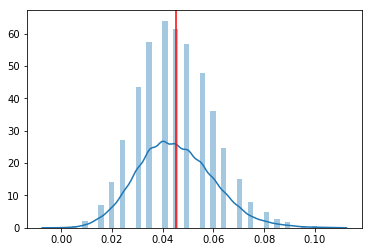

In [4]:
sim_size = 10000

p_hat_vec = []
for i in range(sim_size):
    
    # bootstrap
    obs_bootstrap = np.random.choice(obs_control, size = n_control, replace = True)
    
    # store estimate
    p_hat_vec.append(np.sum(obs_bootstrap)/n_control)
    
# try different settings when plotting    
sns.distplot(p_hat_vec)
plt.axvline(np.mean(p_hat_vec), c = 'red')
plt.show()

#### Step 3 - Calculate the p-value.

Let's calculate the p-value for both the analytic and numerical approaches.

Note that this is a one-tailed test. Recall that you can check this by looking at how the hypotheses were specified.

**Analytic Approach**

Calculate the z-score given our observations in the test group,

\begin{align*}
    \hat{p} = 0.06
\end{align*}

Then,

\begin{align*}
    z &= \frac{0.06 - 0.045}{\sqrt{0.042975/200}}\\
    &= 1.023289
\end{align*}

In [5]:
sigma = np.sqrt(p_control_hat*(1-p_control_hat)/n_control)

z_score = (p_test_hat - p_control_hat)/sigma

print('z-score:', z_score)
print('p-value:', (1 - norm.cdf(z_score)))

z-score: 1.0232890201933016
p-value: 0.15308560679274574


**Numerical Approach**

We simply calculate the probability that we observe samples that are greater than $0.06$ from our bootstrapped sampling distribution.

In [6]:
p_value_bootstrap = np.sum(np.array(p_hat_vec) > p_test_hat)/sim_size

print('p-value:', p_value_bootstrap)

p-value: 0.1224


#### Step 4 - Conclusion.

With a significance level of $\alpha = 0.05$, we see that our p-value is larger compared to the threshold.

Thus, we conclude that:

1. We cannot reject the null hypothesis that the proportion of people that use the new website has a higher conversion rate.

2. There is not enough evidence to suggest that the new website helps increase the premium subscription rate.

---

## What now?

Looking behind the curtain, we KNOW that the new website does does increase the premium subscription rate.

Thus, we WANT to reject the null hypothesis.

Recall the definition of power: <b>the probability that we reject $H_0$ given that $H_0$ is false</b>.

How do we increase the power of our test?

---